<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Student name: <span style="color:blue"><b>Sashank Silwal</b></span><br/>
Grade: <span style="color:blue"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 1</span>
# <span style="color:green">Networks of Hyperlinked Wikipedia Pages</span>

<span style="font-size:large;">
    
* Here, in the beginning, one is selecting a Wikipedia page through a random generator of wikipedia pages.
    
* However, one may start with a predifined Wikipedia page of one's own choice. In this case, one needs to modify Cell 7 below.

* Subsequently, the goal is to find the set of hyperlinks of the original (random) page to other Wikipedia webpages and the graph (directed network) which is formed by all the hyperlinks among the latter webpages.

* To be able to controll the size of this graph, one should set the minimum and the maximum number of hyperlinks from the original (random) page into a fixed interval of values (parameters n and N below).

* At the very end, after running all cells of this notebook, what is plotted is the directed network among hyperlinked Wikipedia pages (alters), all of which are pointed from the randomly selected starting Wikipedia page (the ego). In other words, this is an example of the directed **alter-net** corresponding to a directed **ego-net**. 

In [1]:
# Run the following IN A TERMINAL

# conda install -c conda-forge wikipedia

# conda install -c alubbock pygraphviz

In [1]:
import wikipedia
import random
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings; warnings.simplefilter('ignore')

In [2]:
n=20  # minimum number of hyperlinks of the selected wikipedia page
N=36  # maximum number of hyperlinks of the selected wikipedia page

### Random Selection of a Wikipedia Page

In [4]:
# If this cell runs very slowly, take lower values of n and N.

while True:
    try:
        page=wikipedia.page(wikipedia.random())
    except wikipedia.DisambiguationError as e:
        pass
    except wikipedia.exceptions.PageError as e:
        pass
    hl=sorted([w.replace(" ","_") for w in page.links])
    if len(hl)>n and len(hl)<N:
        break

# if len(page.links) > N-1:
#     print "The (randomly) selected '%s' Wikipedia page has totally %i hyperlinks:" %(page.title,len(page.links))
#     print

p=sorted([w.replace(" ","_") for w in page.links])

print "The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The 21 hyperlinks from the (randomly) selected 'She Went to the Races' Wikipedia page are:

1. Adrienne_Fazan
2. Alan_Friedman
3. Ava_Gardner
4. Buster_Keaton
5. Charles_Halton
6. Chester_Clute
7. Comedy_film
8. Edmund_Gwenn
9. Frances_Gifford
10. Frank_Orth
11. Frederick_Stephani
12. Horse_races
13. IMDb
14. J.M._Kerrigan
15. James_Craig_(actor)
16. Joe_Hernandez_(race_caller)
17. Metro-Goldwyn-Mayer
18. Nathaniel_Shilkret
19. Reginald_Owen
20. Sig_Ruman
21. Willis_Goldbeck


In [5]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

Adrienne_Fazan has 2 hyperlinks to webpages: 
 IMDb, Metro-Goldwyn-Mayer

Ava_Gardner has 2 hyperlinks to webpages: 
 IMDb, Metro-Goldwyn-Mayer

Buster_Keaton has 2 hyperlinks to webpages: 
 IMDb, Metro-Goldwyn-Mayer

Charles_Halton has 1 hyperlinks to webpages: 
 IMDb

Chester_Clute has 1 hyperlinks to webpages: 
 IMDb

Comedy_film has 1 hyperlinks to webpages: 
 Buster_Keaton

Edmund_Gwenn has 2 hyperlinks to webpages: 
 Comedy_film, IMDb

Frances_Gifford has 3 hyperlinks to webpages: 
 IMDb, Ava_Gardner, Metro-Goldwyn-Mayer

Frank_Orth has 1 hyperlinks to webpages: 
 IMDb

Frederick_Stephani has 1 hyperlinks to webpages: 
 IMDb

J.M._Kerrigan has 1 hyperlinks to webpages: 
 IMDb

James_Craig_(actor) has 1 hyperlinks to webpages: 
 IMDb

Joe_Hernandez_(race_caller) has 1 hyperlinks to webpages: 
 IMDb

Metro-Goldwyn-Mayer has 2 hyperlinks to webpages: 
 Buster_Keaton, IMDb

Nathaniel_Shilkret has 2 hyperlinks to webpages: 
 IMDb, Metro-Goldwyn-Mayer

Reginald_Owen has 2 hyperlinks to

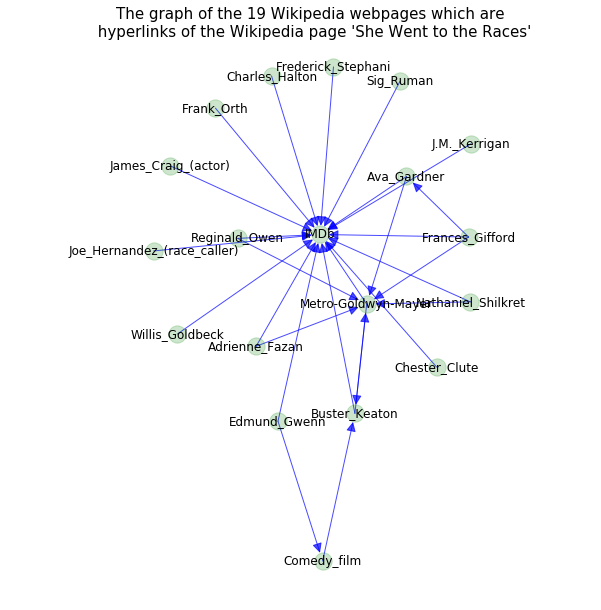

In [6]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 

### Using a Predefined Wikipedia Page

In [5]:
# IF ONE WANTS TO USE A PREDEFINED WEBPAGE, 
# one should uncomment and run the following lines
# Here, I've considered as predefined Wikipedia page the page of the
# 'United_States_women%27s_national_soccer_team' but you may take
# instead anything you like. Notice, that subsequently I am filtering
# a random sample of 20 hyperlinks. This might need to change if the
# page you have selected has fewer hyperlinks.

# page=wikipedia.page('United_States_women%27s_national_soccer_team') #'https://en.wikipedia.org/wiki/United_States_women%27s_national_soccer_team'
# https://en.wikipedia.org/wiki/Bhaktapur
page=wikipedia.page('Nepal')
    
print "The Wikipedia page '%s' has totally %i hyperlinks:" %(page.title,len(page.links))
print

number_of_hyperlinks = 20
p=random.sample(sorted([w.replace(" ","_") for w in page.links]),number_of_hyperlinks)

print "The %i randomly selected hyperlinks from the Wikipedia page '%s' are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The Wikipedia page 'Nepal' has totally 895 hyperlinks:

The 20 randomly selected hyperlinks from the Wikipedia page 'Nepal' are:

1. South_Asia_Satellite
2. SAARC_Literary_Award
3. Magars
4. Myanmar–Thailand_relations
5. Renewable_energy_in_Honduras
6. Early_modern_period
7. Renewable_energy_in_Luxembourg
8. Kyrgyzstan
9. Indian_independence_movement
10. Renewable_energy_in_Brazil
11. Renewable_energy_in_Bhutan
12. Temperate_broadleaf_and_mixed_forest
13. Gully_cricket
14. Energy_in_Switzerland
15. English_language
16. History_of_Nepal
17. ISO_3166
18. Singha_Durbar
19. South_Asian_Association_for_Regional_Cooperation
20. Nepalese_cuisine


In [6]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

South_Asia_Satellite has 2 hyperlinks to webpages: 
 South_Asian_Association_for_Regional_Cooperation, SAARC_Literary_Award

Renewable_energy_in_Honduras has 4 hyperlinks to webpages: 
 Renewable_energy_in_Bhutan, Energy_in_Switzerland, Renewable_energy_in_Luxembourg, Renewable_energy_in_Brazil

Renewable_energy_in_Luxembourg has 4 hyperlinks to webpages: 
 Renewable_energy_in_Bhutan, Renewable_energy_in_Honduras, Energy_in_Switzerland, Renewable_energy_in_Brazil

Kyrgyzstan has 1 hyperlinks to webpages: 
 ISO_3166

Renewable_energy_in_Brazil has 4 hyperlinks to webpages: 
 Renewable_energy_in_Bhutan, Renewable_energy_in_Honduras, Renewable_energy_in_Luxembourg, Energy_in_Switzerland

Renewable_energy_in_Bhutan has 4 hyperlinks to webpages: 
 Energy_in_Switzerland, Renewable_energy_in_Honduras, Renewable_energy_in_Luxembourg, Renewable_energy_in_Brazil

English_language has 1 hyperlinks to webpages: 
 South_Asian_Association_for_Regional_Cooperation

History_of_Nepal has 2 hyperlinks t

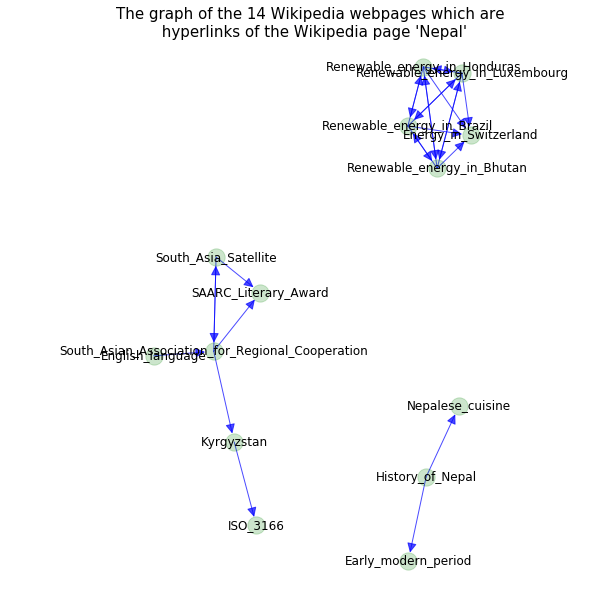

In [7]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 

In [8]:
import pickle 
nx.write_gpickle(G,"graph1.gpickle")

### Fewer Nodes

In [19]:
number_of_hyperlinks = 15
p=random.sample(sorted([w.replace(" ","_") for w in page.links]),number_of_hyperlinks)

print "The %i randomly selected hyperlinks from the Wikipedia page '%s' are:" %(len(p),page.title)
print
for i in range(len(p)):
    print "%i. %s" %(i+1,p[i])

The 15 randomly selected hyperlinks from the Wikipedia page 'Nepal' are:

1. Treaty_of_Sugauli
2. Panchayat_(Nepal)
3. Arid
4. Ghorahi
5. Mauritius
6. Gondwana
7. Community_forestry_in_Nepal
8. Allahabad_Pillar
9. Lalitpur,_Nepal
10. Jane_Wilson-Howarth
11. Renewable_energy_in_Denmark
12. Sports_in_Nepal
13. Mha_Puja
14. Inner_Terai_Valleys_of_Nepal
15. Renewable_energy_in_Sweden


In [23]:
eds=[]
for pp in p:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p))
    if len(ih)>0:
        print "%s has %i hyperlinks to webpages: \n %s" %(pp,len(ih),", ".join(list(ih)))
        print
        for q in ih:
            eds.append((pp,q))

Ghorahi has 1 hyperlinks to webpages: 
 Inner_Terai_Valleys_of_Nepal

Lalitpur,_Nepal has 1 hyperlinks to webpages: 
 Mha_Puja

Jane_Wilson-Howarth has 1 hyperlinks to webpages: 
 Mha_Puja

Renewable_energy_in_Denmark has 1 hyperlinks to webpages: 
 Renewable_energy_in_Sweden

Sports_in_Nepal has 2 hyperlinks to webpages: 
 Inner_Terai_Valleys_of_Nepal, Treaty_of_Sugauli

Inner_Terai_Valleys_of_Nepal has 1 hyperlinks to webpages: 
 Ghorahi

Renewable_energy_in_Sweden has 1 hyperlinks to webpages: 
 Renewable_energy_in_Denmark



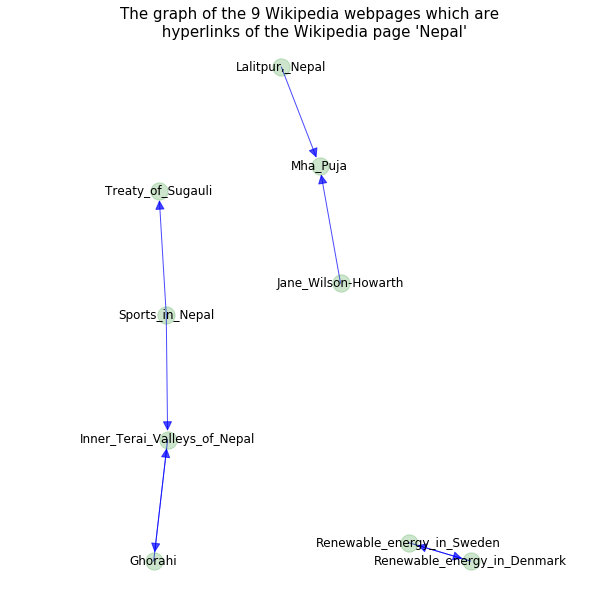

In [24]:
G=nx.DiGraph()
G.add_edges_from(eds)
# print len(G.nodes()),len(G.edges())

pos=graphviz_layout(G)

# pos=nx.spring_layout(G,1.)

plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
ss="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page.title)
plt.title(ss,fontsize=15);
plt.margins(x=0.3, y=0) 